In [1]:
#ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as wb
import pandas as pd
%matplotlib inline

In [2]:
#銘柄の証券コードをリストに格納
#4755:楽天グループ
#7203:トヨタ自動車
#7974:任天堂
SCode=['4755.T','7203.T','7974.T']

#データ格納用の変数を用意
data=pd.DataFrame()

for i in SCode:
    data[i]=wb.DataReader(i,data_source='yahoo',start='2020-1-1',end='2021-12-31')['Adj Close']
    
data.head()

,4755.T,7203.T,7974.T
Date,,,
2020-01-06,916.400024,1427.633179,39097.742188
2020-01-07,930.345215,1455.940552,39280.695312
2020-01-08,914.407837,1437.446533,39006.261719
2020-01-09,920.384338,1447.448486,39683.203125
2020-01-10,916.400024,1445.749756,39738.093750


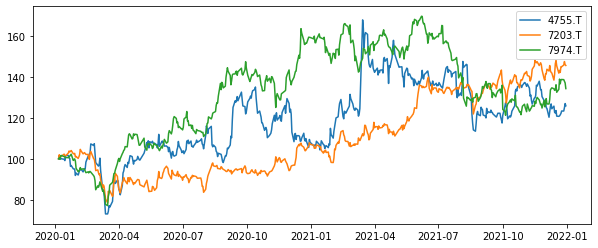

In [3]:
#正規化したものを図示
data_norm=data/data.iloc[0]*100

plt.figure(figsize=(10,4))
for i in SCode:
    plt.plot(data_norm.index,data_norm[i],label=i)
plt.legend()

plt.savefig('./image/fig_value_norm.jpg')
plt.show()

In [4]:
#利益率の計算
returns=(data/data.shift(1))-1
returns.head()

,4755.T,7203.T,7974.T
Date,,,
2020-01-06,NaN,NaN,NaN
2020-01-07,0.015217,0.019828,0.004679
2020-01-08,-0.017131,-0.012702,-0.006986
2020-01-09,0.006536,0.006958,0.017355
2020-01-10,-0.004329,-0.001174,0.001383


In [5]:
#重み定義
w=np.array([0.2,0.3,0.5])

#1日あたりの利益率
returns_d=returns.mean()

#1年あたりの利益率
returns_a=returns_d*250

print('個別銘柄の利益率')
print(round(returns_a,4)*100)

#ポートフォリオの利益率の計算
returns_portfolio=np.dot(returns_a,w)

print()
print('ポートフォリオの利益率')
print(str(round(returns_portfolio,4)*100)+'%')

個別銘柄の利益率
4755.T    20.50
7203.T    22.92
7974.T    19.28
dtype: float64

ポートフォリオの利益率
20.62%
